In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

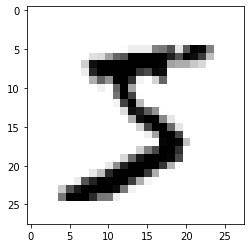

5


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

print(y_train[0]) 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

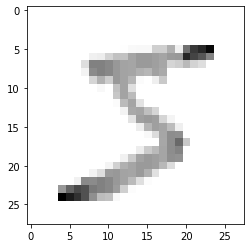

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1075 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0728 - accuracy: 0.9773


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1047 - accuracy: 0.9680
0.10470789670944214
0.9679999947547913


In [6]:
model.save('kerasNN.model')
new_model = tf.keras.models.load_model('kerasNN.model')
predictions = new_model.predict(x_test)
print(predictions)

INFO:tensorflow:Assets written to: kerasNN.model\assets
[[2.75271113e-08 2.87077711e-07 4.53125540e-05 ... 9.97961164e-01
  5.22805635e-07 4.51392771e-06]
 [2.81384316e-09 2.60559988e-04 9.99712408e-01 ... 5.16158366e-11
  1.08355994e-06 5.49430683e-12]
 [2.06797743e-08 9.99882817e-01 6.16988757e-07 ... 3.26031004e-05
  6.35823599e-05 2.72474972e-06]
 ...
 [9.78385462e-09 6.69203814e-07 3.05907633e-09 ... 1.13648130e-05
  4.00531007e-06 4.63136355e-04]
 [1.51188515e-05 2.72930379e-06 6.91804800e-08 ... 4.81424468e-06
  1.97723784e-04 1.55747543e-07]
 [2.07008748e-06 2.68415391e-07 1.09085586e-05 ... 1.01255342e-08
  2.04663752e-06 1.73097658e-09]]


7


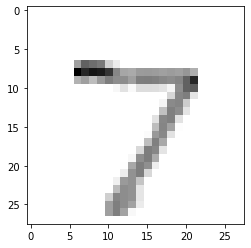

2


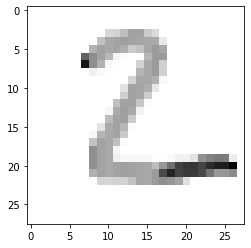

1


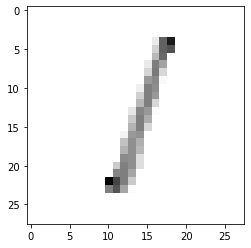

0


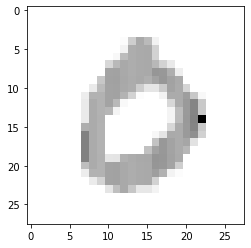

4


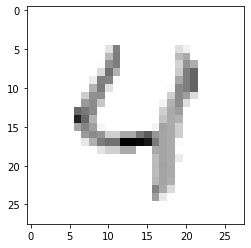

In [7]:
import numpy as np
for i in range(5):
    print(np.argmax(predictions[i]))
    plt.imshow(x_test[i],cmap=plt.cm.binary)
    plt.show()